# Datamining Mid task

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
wine_data = pd.read_csv("winequality-red.csv")

In [3]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Check Nan, None Data

In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 2-6.5 is bad, 6.5-8 is good

In [5]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']

In [6]:
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [7]:
wine_data['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [8]:
label_quality = LabelEncoder()

In [9]:
label_quality

LabelEncoder()

# 0 => Bad data 1382 
# 1 => Good data 217

In [10]:
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])
wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

# X is Feature in Dataset
# Y is  Label

In [13]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


!pip install imblearn
# install imblearn and delayed

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
os =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = os.fit_resample(X, y)

# Check result(1599 => 2764)

In [16]:
X_train_res.shape, y_train_res.shape

((2764, 11), (2764,))

In [17]:
X_train_res

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
2759,9.5,0.39,0.41,8.9,0.069,18.0,39.0,0.99859,3.29,0.81,10.9
2760,8.8,0.24,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3
2761,10.2,0.34,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1
2762,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0


# X_train_res is 80% X_test_res 20%

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train_res, y_train_res, test_size=0.2, random_state=1, stratify=y_train_res)

# Use StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
X_train_std.shape,X_test_std.shape

((2211, 11), (553, 11))

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression

In [22]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time

In [23]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [24]:
lr = LogisticRegression(solver='liblinear', multi_class='auto', random_state=1)
lr.fit(X_train_std, y_train)
expected = y_test
predicted = lr.predict(X_test_std)
acc=accuracy_score(expected, predicted)
print(acc)

0.7974683544303798


In [25]:
def Logistic_Regression_Penalty():
    C_list=[]
    accs=[]
    for i in tqdm(np.arange(-10., 10.)):
        lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**i, random_state=1)
        lr.fit(X_train_std, y_train)
        expected = y_test
        predicted = lr.predict(X_test_std)
        acc=accuracy_score(expected, predicted)
        C_list.append(i)
        accs.append(acc)
    return accs, C_list, lr

In [26]:
accs,C_list, lr=Logistic_Regression_Penalty()

100%|██████████| 20/20 [00:00<00:00, 465.19it/s]


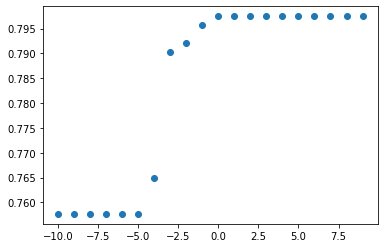

In [27]:
plt.scatter(C_list,accs)

# C`Value is up Acc is up

In [28]:
lr.intercept_

array([-0.08008603])

In [29]:
np.set_printoptions(8)

In [30]:
lr.coef_[lr.coef_!=0].shape

(11,)

In [31]:
lr.coef_[0]

array([ 0.54262436, -0.49561406,  0.04862034,  0.31147562, -0.36128301,
        0.10927769, -0.51697993, -0.44927767,  0.01741637,  0.70726119,
        1.06487068])

# Check Feature`s Weight

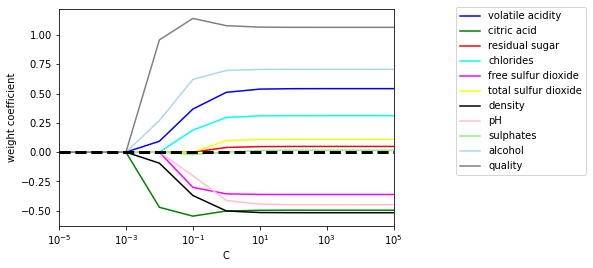

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-10., 10.):
    lr = LogisticRegression(solver='liblinear', multi_class='auto',
                            penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=wine_data.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

# K-NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_Result():
    accs=[]
    N_list=[]
    for i in tqdm(range(200)):
        neigh = KNeighborsClassifier(n_neighbors=i+1)
        neigh.fit(X_train_std, y_train)
        expected = y_test
        predicted = neigh.predict(X_test_std)
        acc=accuracy_score(expected, predicted)
        accs.append(acc)
        N_list.append(i+1)
    return accs, N_list

In [34]:
accs, N_list = KNN_Result()

100%|██████████| 200/200 [00:07<00:00, 27.48it/s]


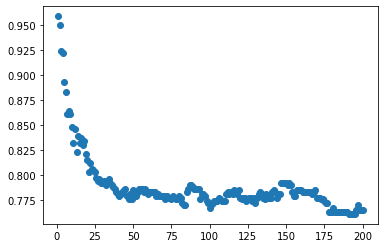

In [35]:
plt.scatter(N_list, accs)

# KNN(n_neighbor up) => Acc up

# SVM

In [36]:
from sklearn.svm import SVC
def SVM_Result():
    accs=[]
    C_list=[]
    for c in tqdm(np.arange(-5., 3.)):
        svm = SVC(kernel='linear', C=10.**c, random_state=1)
        svm.fit(X_train_std, y_train)
        expected = y_test
        predicted = svm.predict(X_test_std)
        acc=accuracy_score(expected, predicted)
        accs.append(acc)
        C_list.append(c)
    return accs, C_list

In [37]:
accs, C_list=SVM_Result()

100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


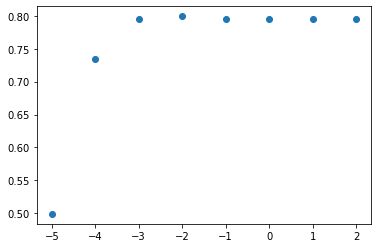

In [38]:
plt.scatter(C_list,accs)

# Decision Tree
## Decsision Tree is not use Standard Scalar

In [39]:
from sklearn import tree
def Decision_Tree():
    M_list=[]
    accs=[]
    for i in tqdm(range(15)):
        classifier = tree.DecisionTreeClassifier(max_depth=i+1)
        classifier.fit(X_train, y_train)
        expected = y_test
        predicted = classifier.predict(X_test)
        acc= accuracy_score(expected, predicted)
        accs.append(acc)
        M_list.append(i+1)
    return M_list, accs

In [40]:
M_list, accs=Decision_Tree()

100%|██████████| 15/15 [00:00<00:00, 154.09it/s]


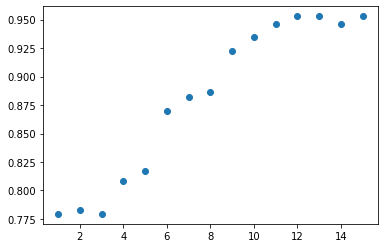

In [41]:
plt.scatter(M_list,accs)

# Increase M`s Value ACC up

# RandomForest

In [42]:
from sklearn import ensemble
def Random_Forest():
    M_list=[]
    accs=[]
    for i in tqdm(range(15)):
        classifier = ensemble.RandomForestClassifier(n_estimators=20, max_depth=i+1, criterion="gini")
        classifier.fit(X_train, y_train)
        expected = y_test
        predicted = classifier.predict(X_test)
        acc= accuracy_score(expected, predicted)
        accs.append(acc)
        M_list.append(i+1)
    return M_list, accs

In [43]:
M_list, accs=Random_Forest()

100%|██████████| 15/15 [00:00<00:00, 25.16it/s]


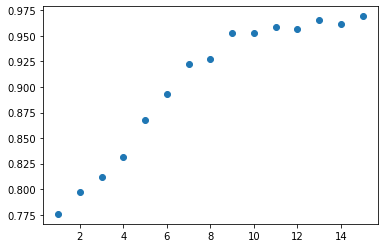

In [44]:
plt.scatter(M_list,accs)

# Increase M`s Value Acc up

# AdaBoost

In [45]:
def AdaBoost():
    M_list=[]
    accs=[]
    for i in tqdm(range(15)):
        classifier = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i+1), n_estimators=20)
        classifier.fit(X_train, y_train)
        expected = y_test
        predicted = classifier.predict(X_test)
        acc= accuracy_score(expected, predicted)
        accs.append(acc)
        M_list.append(i+1)
    return M_list, accs

In [46]:
M_list, accs=AdaBoost()

100%|██████████| 15/15 [00:01<00:00,  9.11it/s]


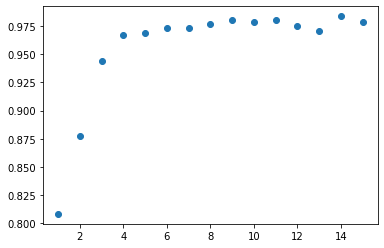

In [47]:
plt.scatter(M_list,accs)

In [48]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# KNN

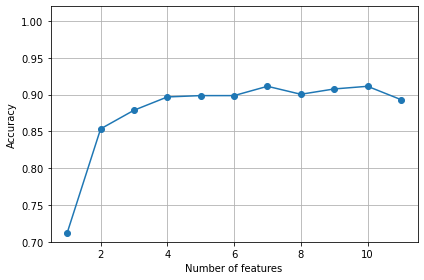

In [49]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택합니다.
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 특성 조합의 성능 그래프를 출력합니다.
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

# Logistic

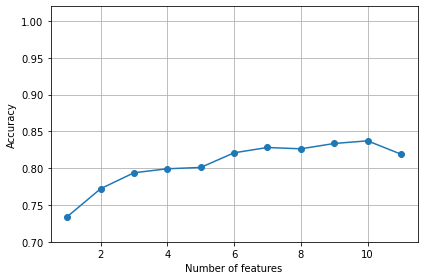

In [50]:
logistic= LogisticRegression(solver='liblinear', multi_class='auto', C=10, random_state=1)
sbs = SBS(logistic, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

# SVM

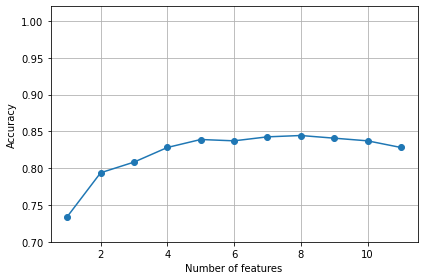

In [51]:
svm=svm = SVC(kernel='linear', C=1, random_state=1)
sbs = SBS(svm, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

# Check Random Forest Feature

 1) quality                        0.217484
 2) alcohol                        0.154817
 3) citric acid                    0.125152
 4) residual sugar                 0.096077
 5) pH                             0.074935
 6) density                        0.071396
 7) free sulfur dioxide            0.064761
 8) volatile acidity               0.058319
 9) sulphates                      0.046675
10) chlorides                      0.045770
11) total sulfur dioxide           0.044613


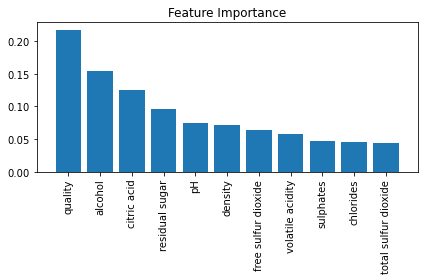

In [52]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = wine_data.columns[1:]

forest = RandomForestClassifier(n_estimators=500,max_depth=10,
                                random_state=1,criterion='gini')

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# quality is best important

# Check Decision Tree Feature

 1) quality                        0.371824
 2) alcohol                        0.178096
 3) citric acid                    0.089931
 4) density                        0.070015
 5) residual sugar                 0.067007
 6) total sulfur dioxide           0.056423
 7) pH                             0.044234
 8) sulphates                      0.039066
 9) chlorides                      0.033563
10) free sulfur dioxide            0.028186
11) volatile acidity               0.021655


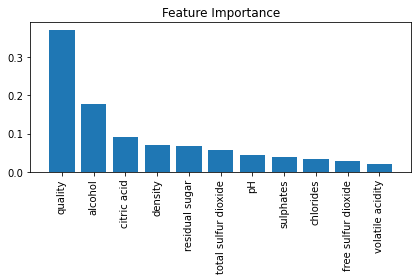

In [53]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = wine_data.columns[1:]

forest = classifier = tree.DecisionTreeClassifier(max_depth=10)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# AdaBoost

 1) quality                        0.225961
 2) pH                             0.164909
 3) alcohol                        0.106086
 4) sulphates                      0.097454
 5) citric acid                    0.094142
 6) free sulfur dioxide            0.071998
 7) total sulfur dioxide           0.057853
 8) volatile acidity               0.054180
 9) density                        0.049530
10) residual sugar                 0.039735
11) chlorides                      0.038153


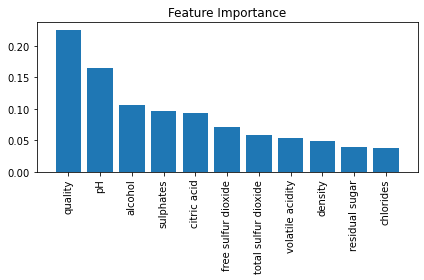

In [54]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = wine_data.columns[1:]

forest = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=10), n_estimators=2)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()